## Testumgebung
- **DBMS**: PostgreSQL
- **Programmiersprache**: Python
- **Matrixgrößen**: `l ∈ [8, 16, 32, 64, 128 256]`
- **Sparsity-Werte**: `s ∈ [0.1, 0.3, 0.5, 0.7, 0.9]`


In [1]:
#jupyter nbconvert --to html --no-input /home/kiwi/DJR/DBnonRelational/HW2/Gruppe14.ipynb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# load csv file
data = pd.read_csv("./benchmark_results.csv")

In [2]:

# Create a pivot table sparsity
pivot_df = data.pivot_table(
    index=["sparsity"],
    columns="approach",
    values="time",
    aggfunc="mean",
).reset_index()

print(pivot_df)

approach  sparsity  ansatz_0  ansatz_1  ansatz_2
0              0.1  0.788182  0.958461  0.343805
1              0.3  0.799753  0.538948  0.351610
2              0.5  0.758235  0.340511  0.342511
3              0.7  0.710881  0.154684  0.331702
4              0.9  0.677019  0.047291  0.326109


<Axes: title={'center': 'Benchmark Results - Sparsity'}, xlabel='Sparsity', ylabel='Time (s)'>

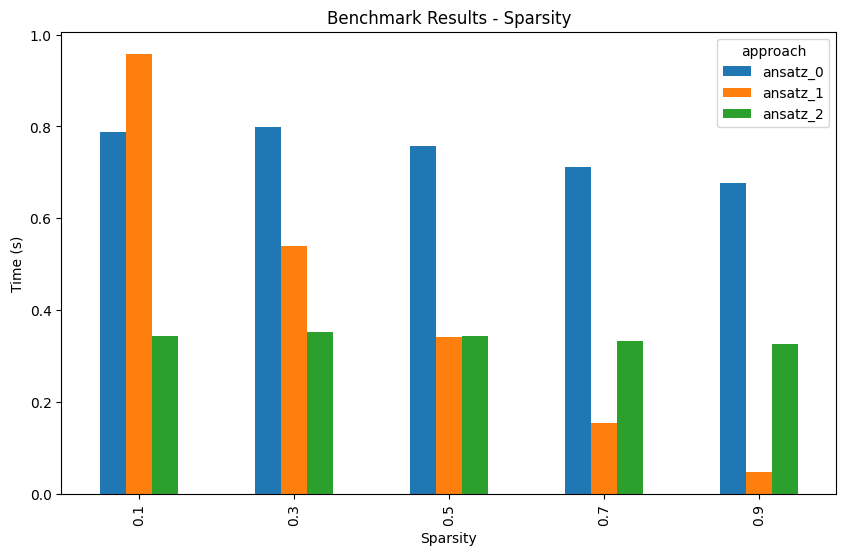

In [3]:
fig, ax = plt.subplots(figsize=(10, 6))
pivot_df.plot(
    x="sparsity",
    kind="bar",
    ax=ax,
    title="Benchmark Results - Sparsity",
    xlabel="Sparsity",
    ylabel="Time (s)",
)

In [4]:
# create pivot table size
pivot_df = data.pivot_table(
    index=["size"],
    columns="approach",
    values="time",
    aggfunc="mean",
).reset_index()

print(pivot_df)

approach  size  ansatz_0  ansatz_1  ansatz_2
0            8  0.007876  0.006515  0.005121
1           16  0.014979  0.007803  0.006285
2           32  0.049224  0.014444  0.010593
3           64  0.171773  0.048590  0.038015
4          128  0.733011  0.266992  0.231834
5          256  3.504021  2.103530  1.743036


<Axes: title={'center': 'Benchmark Results - Size'}, xlabel='Size', ylabel='Time (s)'>

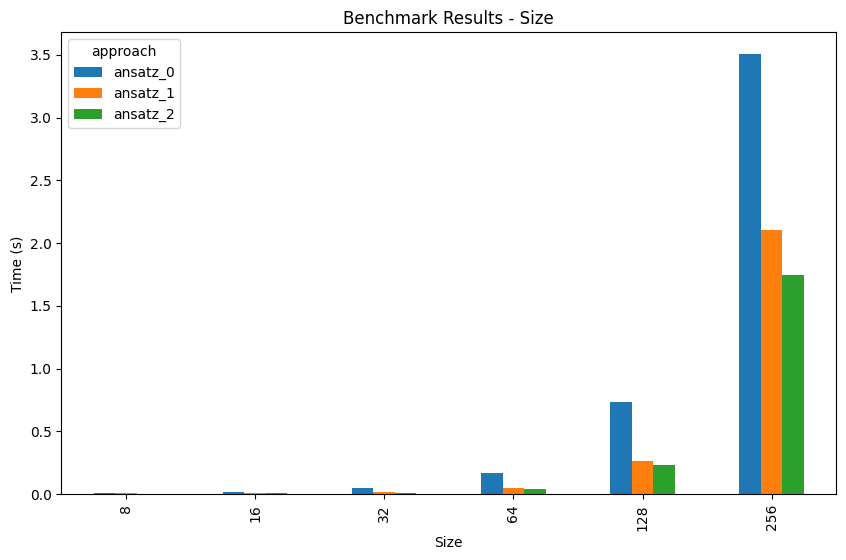

In [5]:
# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
pivot_df.plot(
    x="size",
    kind="bar",
    ax=ax,
    title="Benchmark Results - Size",
    xlabel="Size",
    ylabel="Time (s)",
)

In [6]:

# X-Achsen-Labels erstellen: Kombination aus size und sparsity
data['size_sparsity'] = list(zip(data['size'], data['sparsity']))
x_labels = [f"({s}, {sp})" for s, sp in data['size_sparsity'].unique()]

# Approaches extrahieren
approaches = data['approach'].unique()
num_approaches = len(approaches)
num_groups = len(x_labels)


In [7]:

# Balkenpositionen berechnen
bar_width = 0.8 / num_approaches  # Balkenbreite anpassen
index = np.arange(num_groups)


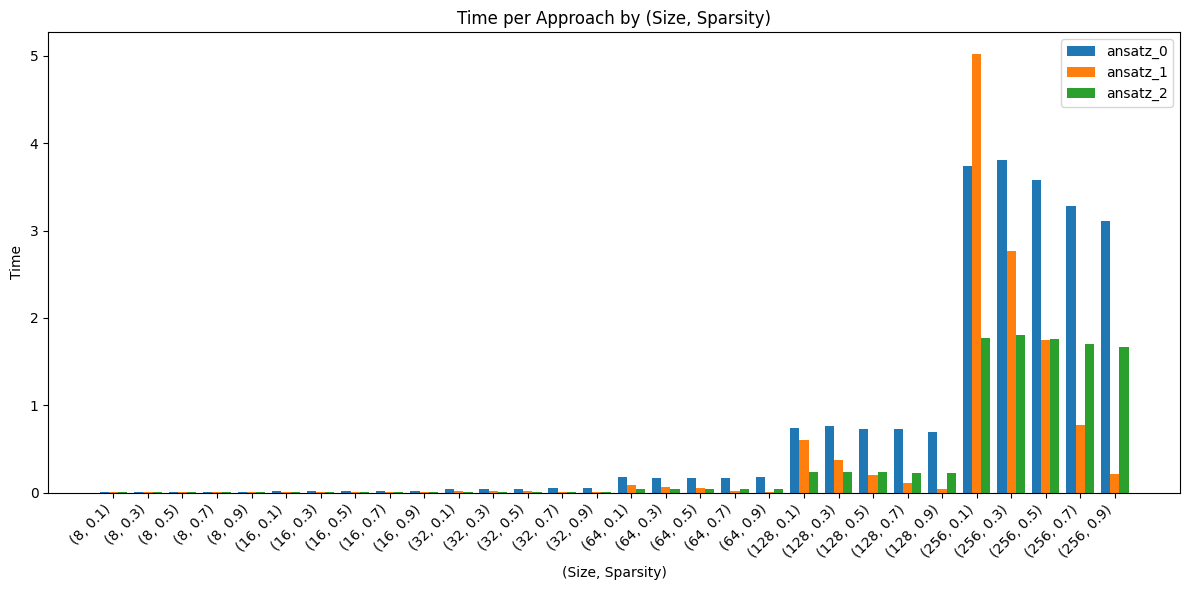

In [8]:

# Plot erstellen
fig, ax = plt.subplots(figsize=(12, 6))

for i, approach in enumerate(approaches):
    approach_data = data[data['approach'] == approach]
    times = approach_data['time']
    # Sicherstellen, dass die Reihenfolge mit x_labels übereinstimmt
    ordered_times = []
    for label in x_labels:
        s, sp = eval(label)  # Konvertiere String zurück zu Tupel
        mask = (approach_data['size'] == s) & (approach_data['sparsity'] == sp)
        ordered_times.append(approach_data[mask]['time'].values[0])
    ax.bar(index + i * bar_width, ordered_times, bar_width, label=approach)

# Beschriftungen
ax.set_xlabel('(Size, Sparsity)')
ax.set_ylabel('Time')
ax.set_title('Time per Approach by (Size, Sparsity)')
ax.set_xticks(index + bar_width * (num_approaches / 2 - 0.5))
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

approach  sparsity  ansatz_0  ansatz_1  ansatz_2
0              0.1  0.007596  0.006625  0.005017
1              0.3  0.008535  0.007787  0.004967
2              0.5  0.007479  0.006114  0.005304
3              0.7  0.007832  0.006109  0.005082
4              0.9  0.007936  0.005940  0.005237
approach  sparsity  ansatz_0  ansatz_1  ansatz_2
0              0.1  0.015453  0.008746  0.005863
1              0.3  0.015094  0.008121  0.006319
2              0.5  0.015163  0.007657  0.006136
3              0.7  0.014649  0.008330  0.006666
4              0.9  0.014538  0.006161  0.006440
approach  sparsity  ansatz_0  ansatz_1  ansatz_2
0              0.1  0.043244  0.023761  0.011179
1              0.3  0.046643  0.018087  0.010512
2              0.5  0.045231  0.013500  0.010341
3              0.7  0.058180  0.009966  0.010592
4              0.9  0.052822  0.006906  0.010343
approach  sparsity  ansatz_0  ansatz_1  ansatz_2
0              0.1  0.183549  0.088633  0.038458
1              0.3  

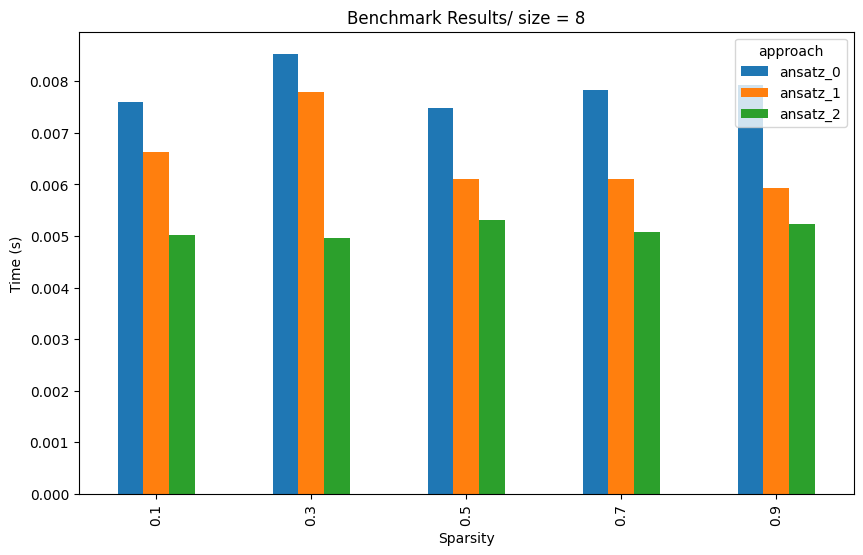

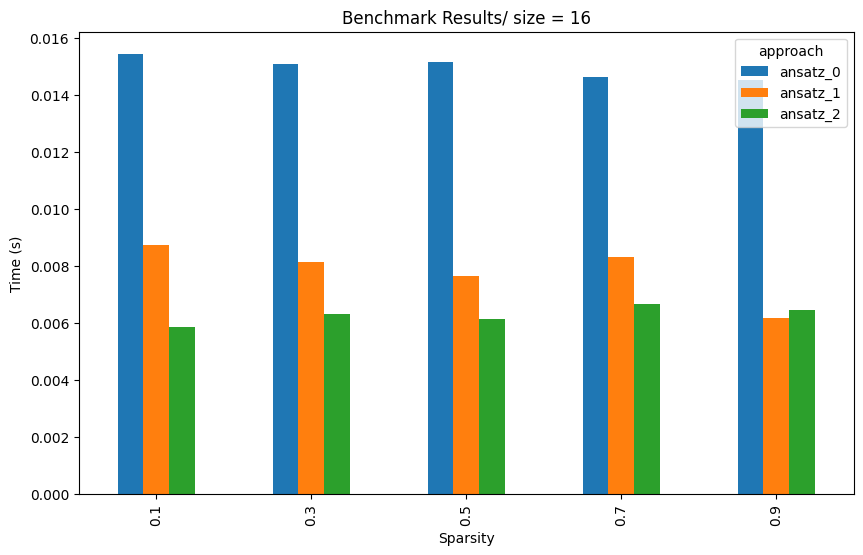

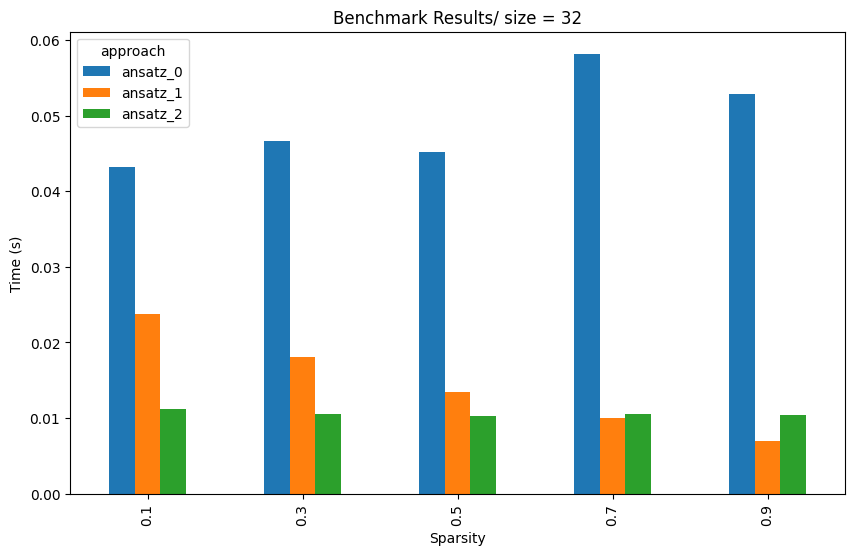

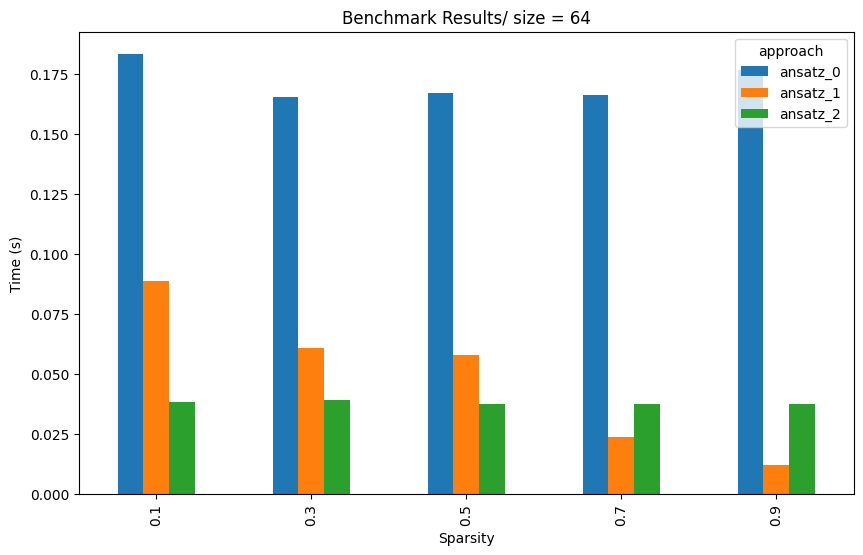

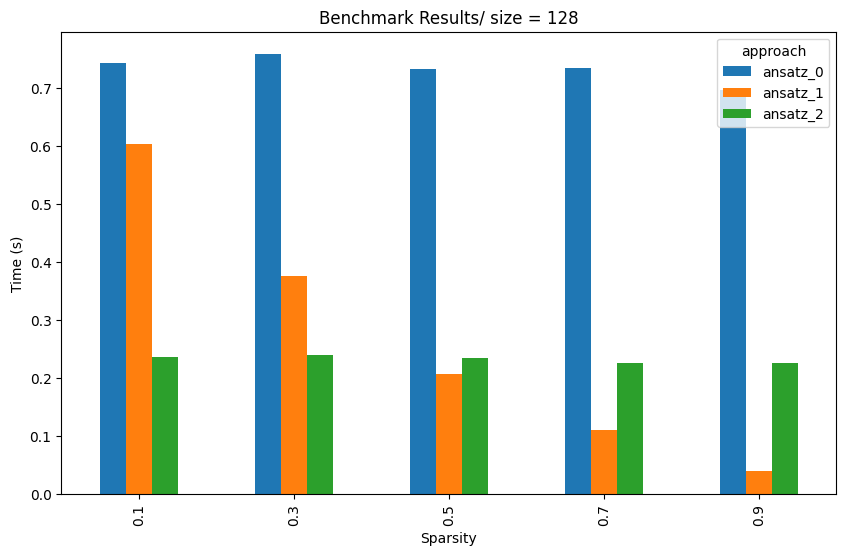

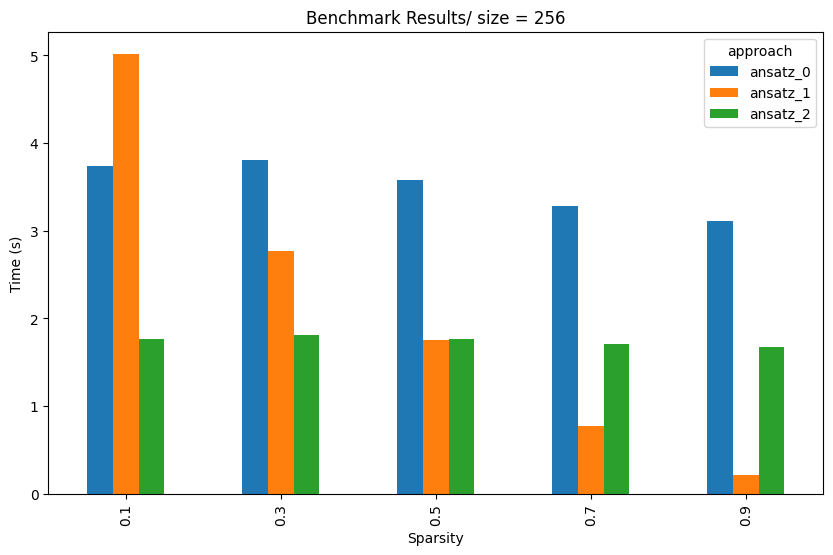

In [9]:

size_list = [8,16,32,64,128,256]


for i in size_list:
    pivot_df = (data[data["size"] == i].pivot_table(
        index=["sparsity"],
        columns="approach",
        values="time",
        aggfunc="mean",
    ).reset_index()
    )

    print(pivot_df)

    fig, ax = plt.subplots(figsize=(10, 6))
    pivot_df.plot(
        x="sparsity",
        kind="bar",
        ax=ax,
        title=f"Benchmark Results/ size = {i}",
        xlabel="Sparsity",
        ylabel="Time (s)",
    )

approach  size  ansatz_0  ansatz_1  ansatz_2
0            8  0.007596  0.006625  0.005017
1           16  0.015453  0.008746  0.005863
2           32  0.043244  0.023761  0.011179
3           64  0.183549  0.088633  0.038458
4          128  0.742692  0.603880  0.235906
5          256  3.736557  5.019120  1.766410
approach  size  ansatz_0  ansatz_1  ansatz_2
0            8  0.008535  0.007787  0.004967
1           16  0.015094  0.008121  0.006319
2           32  0.046643  0.018087  0.010512
3           64  0.165296  0.060626  0.039279
4          128  0.758791  0.375637  0.238922
5          256  3.804160  2.763432  1.809660
approach  size  ansatz_0  ansatz_1  ansatz_2
0            8  0.007479  0.006114  0.005304
1           16  0.015163  0.007657  0.006136
2           32  0.045231  0.013500  0.010341
3           64  0.167009  0.057808  0.037368
4          128  0.733048  0.206936  0.233570
5          256  3.581481  1.751049  1.762345
approach  size  ansatz_0  ansatz_1  ansatz_2
0         

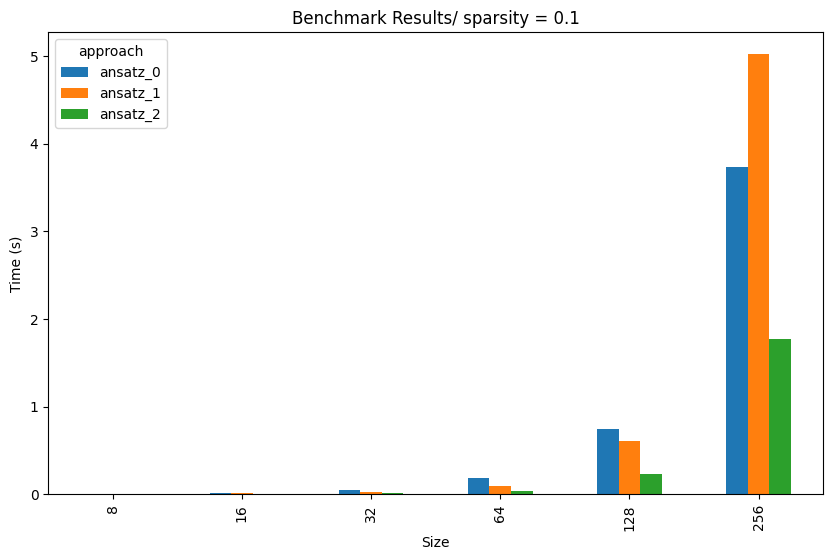

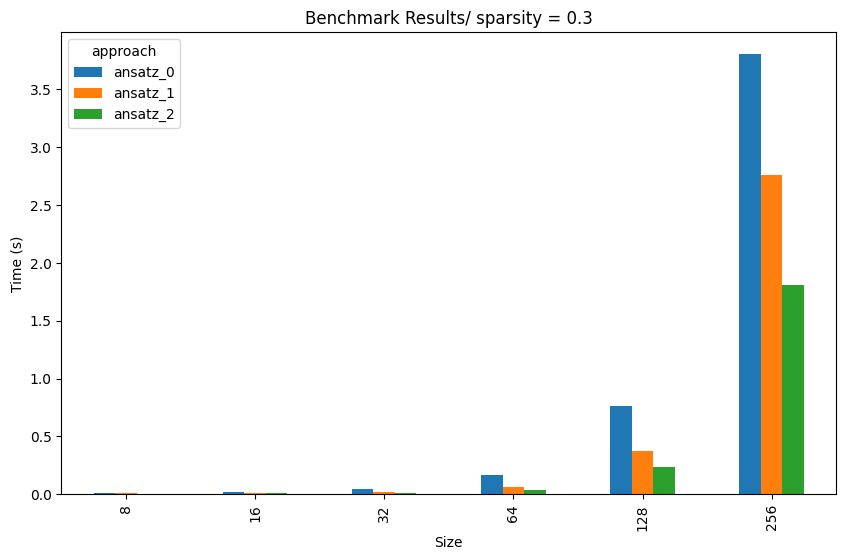

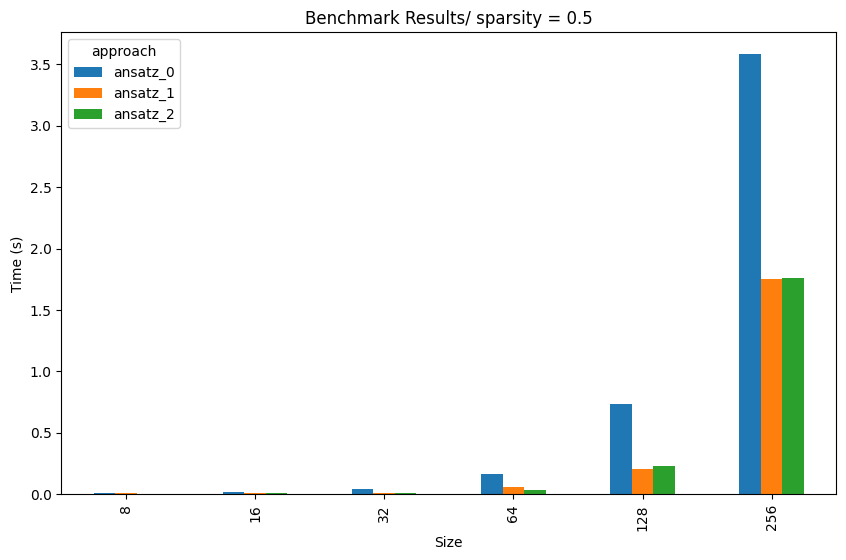

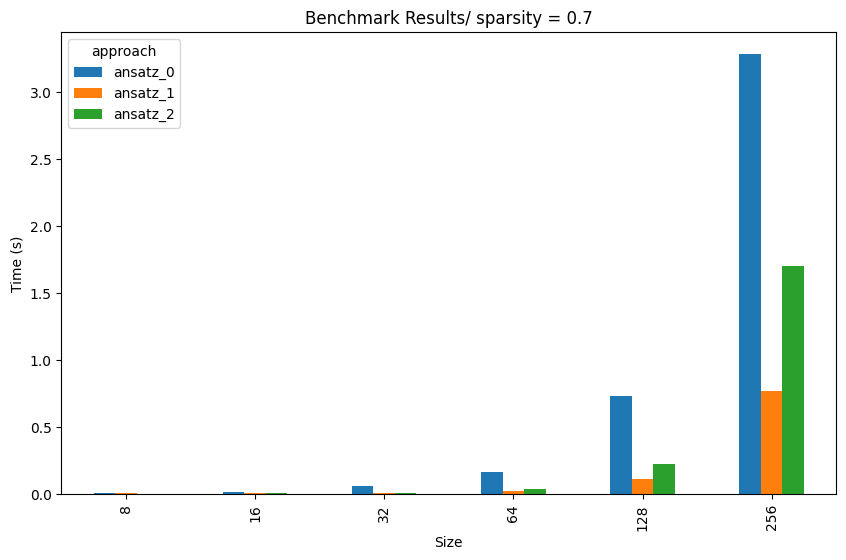

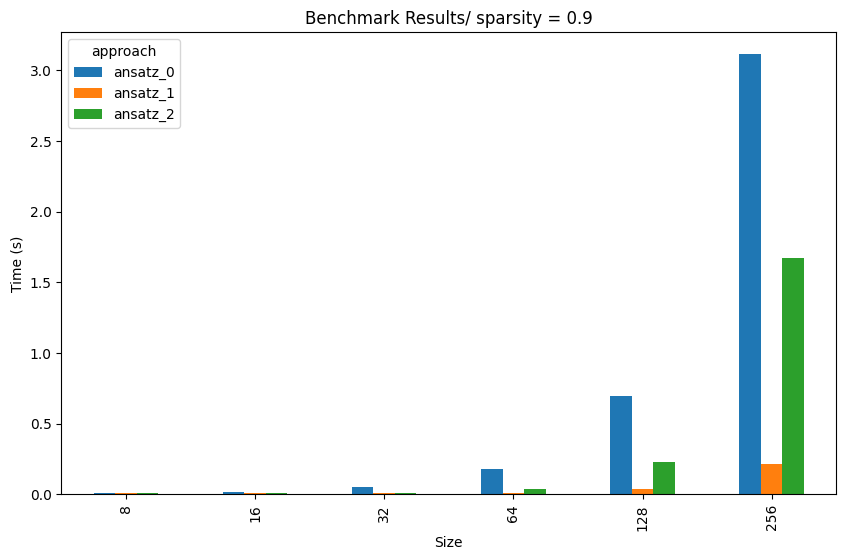

In [10]:
sparsity_list = [0.1, 0.3, 0.5, 0.7, 0.9]


for i in sparsity_list:
    pivot_df = (data[data["sparsity"] == i].pivot_table(
            index=["size"],
            columns="approach",
            values="time",
            aggfunc="mean",
        ).reset_index()
    )

    print(pivot_df)

    fig, ax = plt.subplots(figsize=(10, 6))
    pivot_df.plot(
        x="size",
        kind="bar",
        ax=ax,
        title=f"Benchmark Results/ sparsity = {i}",
        xlabel="Size",
        ylabel="Time (s)",
    )

# Allgemeine Beobachtungen

**Skalierungsverhalten**:  
Alle Ansätze werden mit größeren Matrizen langsamer, vermutlich exponentiell, was der erwarteten Komplexität O(n³) für naive Matrix-Multiplikation entspricht.

**Performance-Ranking**:
- Ansatz 0 (Client-seitig) ist durchweg der langsamste
- Ansatz 1 (SQL-seitig) und Ansatz 2 (Vektor-basiert) zeigen unterschiedliche Stärken abhängig von der Sparsity

# Detaillierte Analyse der Ansätze

## Ansatz 0 (Client-seitige Multiplikation)
**Performance**: Durchweg langsam  
**Sparsity-Einfluss**: Wird mit höherer Sparsity minimal schneller  

**Gründe**:
- Daten müssen zwischen DB und Client transferiert werden
- Python-Implementierung ist nicht für Performance optimiert
- Sparsity hilft minimal, da weniger Nullen verarbeitet werden

## Ansatz 1 (SQL-seitige Multiplikation)
**Performance**: Deutlich schneller als Ansatz 0  
**Sparsity-Einfluss**: Wird mit höherer Sparsity schneller  
**Kreuzpunkt**: Bei Sparsity ~0.5 wird es schneller als Ansatz 2  

**Gründe**:
- Kein Datentransfer zwischen DB und Client
- SQL-Optimierer kann JOINs effizient verarbeiten
- Bei hoher Sparsity werden weniger JOIN-Operationen benötigt

## Ansatz 2 (Vektor-basierte Multiplikation)
**Performance**: Schnell bei niedriger Sparsity, wird von Ansatz 1 bei höherer Sparsity übertroffen  
**Sparsity-Einfluss**: Kaum nennenswerter Einfluss  

**Gründe**:
- Verwendet Array-Operationen in PostgreSQL
- Dot-Produkt-Funktion muss immer die volle Vektorlänge verarbeiten
- Unabhängig von Sparsity, da Arrays immer vollständig sind